In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

RFM

In [3]:
data_clients = pd.read_csv('./datasets/data_clients.csv')
df = data_clients.copy()
df.reset_index(inplace=True)

In [4]:
df.head()

,index,id,"ТЕКСТИЛЬ, ТРИКОТАЖ",ИГРУШКИ,КРУПНОГАБАРИТНЫЙ ТОВАР,СОПУТСТВУЮЩИЕ ТОВАРЫ,ПОДГУЗНИКИ,ОБУВЬ,КОСМЕТИКА/ГИГИЕНА,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",...,Центральный ф.о.,Южный ф.о.,Северо-Западный ф.о.,Сибирский ф.о.,Дальневосточный ф.о.,Количество,Маржа,КОЛ-ВО ЧЕКОВ,СРЕД.КОЛ.ТОВ.вЧеке,СРЕДНИЙ ЧЕК
0,0,55575453-56535648535679,0.300000,0.1,0.0,0.0,0.300000,0.0,0.000000,0.3,...,0.0,0.0,0.0,0.0,0.0,10.0,811.39,1,10.0,3759.0
1,1,55574854-56495552515179,0.000000,0.5,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,204.07,1,4.0,528.0
2,2,55574948-52515357485779,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,6.0,0.0,0.0,0.0,0.0,6.0,758.91,2,3.0,1098.0
3,3,55574851-55504856515370,0.142857,0.0,0.0,0.0,0.000000,0.0,0.428571,0.0,...,7.0,0.0,0.0,0.0,0.0,7.0,2628.51,1,7.0,13550.0
4,4,55574948-52504948534879,0.444444,0.0,0.0,0.0,0.222222,0.0,0.111111,0.0,...,9.0,0.0,0.0,0.0,0.0,9.0,1510.13,2,4.5,3119.5


In [5]:
df_original = pd.read_csv(
    "./datasets/sales.csv",
    sep=None, 
    engine='python'
)

In [6]:
from datetime import datetime

In [7]:
df3 = df_original.copy()
df3.head()

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,...,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
0,01.03.2017 11:41,07.03.2017 0:00,3998972_TR,Частичный возврат,12 098,12 247,Курьерская,Наличная,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,...,0,8,1,28.02.2017 0:00,55574854-48574951555577,106117_ju18@yandex.ru,Юлия,ID9010020114553,0,NaN
1,01.03.2017 12:22,15.03.2017 0:00,3999117_TR,Доставлен,4 819,3 759,Магазины,Безналичная,Челябинск,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,0,3,1,01.03.2017 0:00,55575453-56535648535679,107117_ku16@list.ru,Гость,IDL00028974351,0,NaN
2,01.03.2017 12:31,17.03.2017 0:00,3999122_TR,Доставлен,3 325,3 325,Магазины,Безналичная,Нижневартовск,ИГРУШКИ,...,0,1,1,01.03.2017 0:00,55574950-57515657535772,109117_mu17@mail.ru,Гость,IDL00038573351,0,NaN
3,01.03.2017 3:06,02.03.2017 0:00,3999363_TR,К отгрузке,4 998,4 998,Курьерская,Наличная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,0,4,0,01.03.2017 0:00,55574851-55545249535475,115117_su13@mail.ru,Гость,IDL00034303856,0,NaN
4,01.03.2017 11:38,14.03.2017 0:00,3999411_TR,Доставлен,528,528,Магазины,Безналичная,Ижевск,ИГРУШКИ,...,0,3,1,01.03.2017 0:00,55574854-56495552515179,guest_103117_gu28@workmail.ru,Гость,IDL00035791553,0,NaN


In [8]:
df_original['Дата'] = pd.to_datetime(df_original['Дата'], format='mixed')
df3.rename(columns={'Телефон_new': 'id'}, inplace=True)

In [9]:
df_merged = df.merge(
    df3[['id', 'Дата']],
    on='id',
    how='left'
)

In [10]:
print(df_merged[['id', 'Дата']].head())

                        id              Дата
0  55575453-56535648535679  01.03.2017 12:22
1  55575453-56535648535679  01.03.2017 12:22
2  55575453-56535648535679  01.03.2017 12:22
3  55575453-56535648535679  01.03.2017 12:22
4  55575453-56535648535679  01.03.2017 12:22


In [11]:
df_rfm = df.copy()

In [12]:
current_date = datetime.now()

df_merged['Дата'] = pd.to_datetime(df_merged['Дата'], format='%d.%m.%Y %H:%M', errors='coerce')

current_date = datetime.now()

df_rfm['Recency'] = (current_date - df_merged['Дата']).dt.days

# Заполнение остальных метрик
df_rfm['Frequency'] = df['Количество']
df_rfm['Monetary'] = df['СРЕДНИЙ ЧЕК']

In [13]:
df_rfm.head()

,index,id,"ТЕКСТИЛЬ, ТРИКОТАЖ",ИГРУШКИ,КРУПНОГАБАРИТНЫЙ ТОВАР,СОПУТСТВУЮЩИЕ ТОВАРЫ,ПОДГУЗНИКИ,ОБУВЬ,КОСМЕТИКА/ГИГИЕНА,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",...,Сибирский ф.о.,Дальневосточный ф.о.,Количество,Маржа,КОЛ-ВО ЧЕКОВ,СРЕД.КОЛ.ТОВ.вЧеке,СРЕДНИЙ ЧЕК,Recency,Frequency,Monetary
0,0,55575453-56535648535679,0.300000,0.1,0.0,0.0,0.300000,0.0,0.000000,0.3,...,0.0,0.0,10.0,811.39,1,10.0,3759.0,3033,10.0,3759.0
1,1,55574854-56495552515179,0.000000,0.5,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,4.0,204.07,1,4.0,528.0,3033,4.0,528.0
2,2,55574948-52515357485779,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,6.0,758.91,2,3.0,1098.0,3033,6.0,1098.0
3,3,55574851-55504856515370,0.142857,0.0,0.0,0.0,0.000000,0.0,0.428571,0.0,...,0.0,0.0,7.0,2628.51,1,7.0,13550.0,3033,7.0,13550.0
4,4,55574948-52504948534879,0.444444,0.0,0.0,0.0,0.222222,0.0,0.111111,0.0,...,0.0,0.0,9.0,1510.13,2,4.5,3119.5,3033,9.0,3119.5


In [14]:
df_rfm['R_score'] = pd.qcut(df_rfm['Recency'], 5, labels=[5,4,3,2,1]).astype(int)
df_rfm['F_score'] = pd.qcut(df_rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
df_rfm['M_score'] = pd.qcut(df_rfm['Monetary'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)

In [15]:
df_rfm['RFM_score'] = (
    df_rfm['R_score'].astype(str) +
    df_rfm['F_score'].astype(str) +
    df_rfm['M_score'].astype(str)
)

df_rfm['RFM_total'] = df_rfm[['R_score', 'F_score', 'M_score']].sum(axis=1)

#сегментация
def rfm_segment(x):
    if x >= 13:
        return 'Champions'
    elif x >= 10:
        return 'Loyal Customers'
    elif x >= 7:
        return 'Potential Loyalist'
    elif x >= 4:
        return 'Needs Attention'
    else:
        return 'At Risk'

df_rfm['segment'] = df_rfm['RFM_total'].apply(rfm_segment)

In [16]:
df_rfm.head()

,index,id,"ТЕКСТИЛЬ, ТРИКОТАЖ",ИГРУШКИ,КРУПНОГАБАРИТНЫЙ ТОВАР,СОПУТСТВУЮЩИЕ ТОВАРЫ,ПОДГУЗНИКИ,ОБУВЬ,КОСМЕТИКА/ГИГИЕНА,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",...,СРЕДНИЙ ЧЕК,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,RFM_total,segment
0,0,55575453-56535648535679,0.300000,0.1,0.0,0.0,0.300000,0.0,0.000000,0.3,...,3759.0,3033,10.0,3759.0,1,4,5,145,10,Loyal Customers
1,1,55574854-56495552515179,0.000000,0.5,0.0,0.0,0.000000,0.0,0.000000,0.0,...,528.0,3033,4.0,528.0,1,2,1,121,4,Needs Attention
2,2,55574948-52515357485779,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,1098.0,3033,6.0,1098.0,1,3,2,132,6,Needs Attention
3,3,55574851-55504856515370,0.142857,0.0,0.0,0.0,0.000000,0.0,0.428571,0.0,...,13550.0,3033,7.0,13550.0,1,4,5,145,10,Loyal Customers
4,4,55574948-52504948534879,0.444444,0.0,0.0,0.0,0.222222,0.0,0.111111,0.0,...,3119.5,3033,9.0,3119.5,1,4,4,144,9,Potential Loyalist


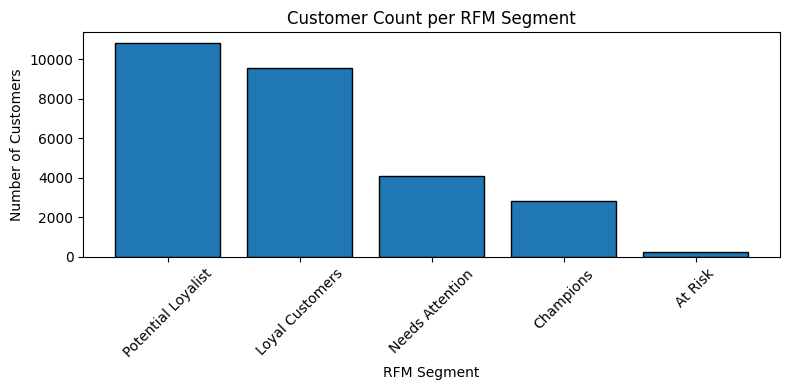

In [17]:
#распределение RFM сегмента
counts = df_rfm['segment'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8, 4))
plt.bar(counts.index, counts.values, edgecolor='black')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.title('Customer Count per RFM Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
#Доли категорий в R
cat_cols = [
    'ТЕКСТИЛЬ, ТРИКОТАЖ','ИГРУШКИ','КРУПНОГАБАРИТНЫЙ ТОВАР','СОПУТСТВУЮЩИЕ ТОВАРЫ',
    'ПОДГУЗНИКИ','ОБУВЬ','КОСМЕТИКА/ГИГИЕНА','КАНЦТОВАРЫ, КНИГИ, ДИСКИ',
    'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ','ДЕТСКОЕ ПИТАНИЕ']

rfm_share_by_rfm = (
    df_rfm
    .groupby('segment')[cat_cols]
    .mean()
    .multiply(100)
    .round(1)
)
rfm_share_by_rfm.index.name = 'RFM Segment'
rfm_share_by_rfm

,"ТЕКСТИЛЬ, ТРИКОТАЖ",ИГРУШКИ,КРУПНОГАБАРИТНЫЙ ТОВАР,СОПУТСТВУЮЩИЕ ТОВАРЫ,ПОДГУЗНИКИ,ОБУВЬ,КОСМЕТИКА/ГИГИЕНА,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,ДЕТСКОЕ ПИТАНИЕ
RFM Segment,,,,,,,,,,
At Risk,18.5,46.1,3.4,0.2,4.5,4.5,6.7,6.0,8.8,1.1
Champions,17.2,15.3,3.5,0.2,14.4,2.2,11.4,3.8,7.0,25.0
Loyal Customers,17.4,22.6,6.8,0.2,15.9,3.8,9.0,4.3,6.6,13.4
Needs Attention,17.6,37.1,4.0,0.3,11.4,4.3,7.3,5.8,9.8,2.3
Potential Loyalist,17.1,30.7,6.4,0.2,15.8,4.3,7.4,5.2,7.1,5.7


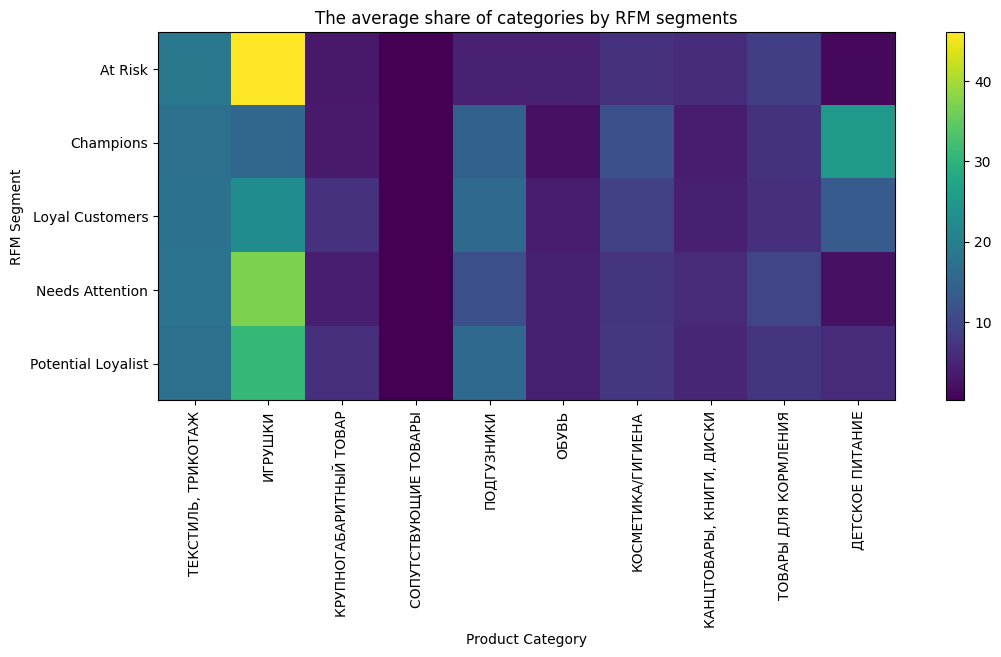

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(rfm_share_by_rfm.values)
ax.set_xticks(np.arange(len(cat_cols)))
ax.set_xticklabels(cat_cols, rotation=90)
ax.set_yticks(np.arange(len(rfm_share_by_rfm.index)))
ax.set_yticklabels(rfm_share_by_rfm.index)
plt.colorbar(im, ax=ax)
ax.set_title("The average share of categories by RFM segments")
plt.xlabel('Product Category')
plt.ylabel('RFM Segment')
plt.tight_layout()
plt.show()

Hierarchical clustering for RFM segment "AT RISK"

In [20]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
df = df_rfm.copy()

In [21]:
df_at_risk_full = df[df['segment']=='At Risk'].copy()

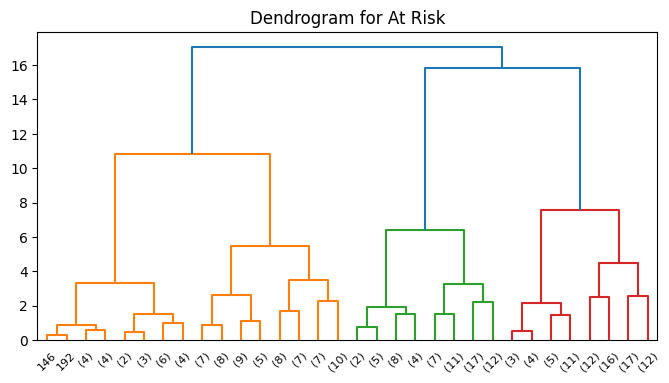

In [22]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

X = df_at_risk_full[['Recency','Frequency','Monetary']]
X_scaled = StandardScaler().fit_transform(X)

Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(8,4))
dendrogram(Z, truncate_mode='level', p=4)
plt.title("Dendrogram for At Risk")
plt.show()

In [23]:
df_at_risk_full['subcluster'] = fcluster(Z, 3, criterion='maxclust')

In [24]:
category_cols = [
    'ТЕКСТИЛЬ, ТРИКОТАЖ','ИГРУШКИ','КРУПНОГАБАРИТНЫЙ ТОВАР','СОПУТСТВУЮЩИЕ ТОВАРЫ',
    'ПОДГУЗНИКИ','ОБУВЬ','КОСМЕТИКА/ГИГИЕНА','КАНЦТОВАРЫ, КНИГИ, ДИСКИ',
    'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ','ДЕТСКОЕ ПИТАНИЕ'
]

# Group by subcluster and calculate average shares
profile = (
    df_at_risk_full
    .groupby('subcluster')[category_cols]
    .mean()
    .round(3)
)

profile

,"ТЕКСТИЛЬ, ТРИКОТАЖ",ИГРУШКИ,КРУПНОГАБАРИТНЫЙ ТОВАР,СОПУТСТВУЮЩИЕ ТОВАРЫ,ПОДГУЗНИКИ,ОБУВЬ,КОСМЕТИКА/ГИГИЕНА,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,ДЕТСКОЕ ПИТАНИЕ
subcluster,,,,,,,,,,
1,0.209,0.448,0.058,0.000,0.052,0.012,0.035,0.058,0.128,0.000
2,0.121,0.508,0.000,0.000,0.030,0.023,0.152,0.091,0.038,0.038
3,0.212,0.438,0.038,0.006,0.050,0.100,0.031,0.038,0.088,0.000


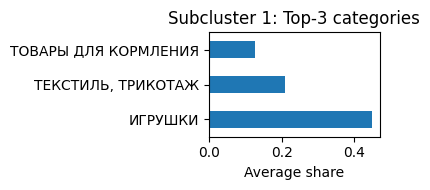

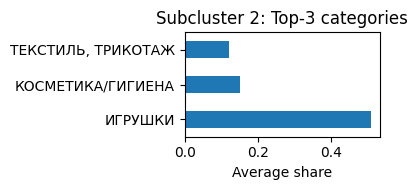

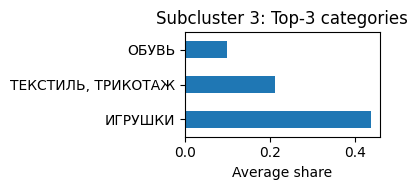

In [25]:
for sc in profile.index:
    top3 = profile.loc[sc].sort_values(ascending=False).head(3)
    plt.figure(figsize=(4,2))
    top3.plot.barh()
    plt.title(f"Subcluster {sc}: Top-3 categories")
    plt.xlabel("Average share")
    plt.tight_layout()
    plt.show()

MBA

In [78]:
df_clean = pd.read_csv('./datasets/df_clean.csv',
                        sep=None, 
                        engine='python')

In [79]:
df = df_clean.copy()
df = df.reset_index(drop=True)

In [80]:
df.head()

,НомерЗаказаНаСайте,ФормаОплаты,Регион,Группа1,Группа2,Группа3,Тип,Номенклатура,ТипТовара,Количество,Цена,СуммаСтроки,Маржа,Телефон_new
0,3999117_TR,Безналичная,Уральский ф.о.,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),боди,ОДЕЖДА,"GAMEX, БОДИ кор. рук. Roza, (бел/сер), р. 86, ...",МГТ,1.0,379.0,379.0,169.20,55575453-56535648535679
1,3999411_TR,Безналичная,Приволжский ф.о.,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,игрушки для ванной,ИГРУШКИ,"S+S TOYS, ИГРУШКА ПВХ в наборе, (2 шт)",МГТ,1.0,199.0,199.0,120.00,55574854-56495552515179
2,3999713_TR,Безналичная,Центральный ф.о.,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),футболки,ОДЕЖДА,"FUN TIME, СОРОЧКА верхняя с воротом поло, р. 3 г",МГТ,1.0,349.0,349.0,105.91,55574948-52515357485779
3,3999713_TR,Безналичная,Центральный ф.о.,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),футболки,ОДЕЖДА,"FUN TIME, СОРОЧКА верхняя с воротом поло, р. 3 г",МГТ,1.0,349.0,349.0,105.91,55574948-52515357485779
4,3999713_TR,Безналичная,Центральный ф.о.,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),рубашки,ОДЕЖДА,"FUN TIME, СОРОЧКА верхняя, р. 3 г",МГТ,1.0,449.0,449.0,142.72,55574948-52515357485779


In [82]:
df['Группа1_Группа2'] = df['Группа1'] + '_' + df['Группа2']

In [83]:
df.head()

,НомерЗаказаНаСайте,ФормаОплаты,Регион,Группа1,Группа2,Группа3,Тип,Номенклатура,ТипТовара,Количество,Цена,СуммаСтроки,Маржа,Телефон_new,Группа1_Группа2
0,3999117_TR,Безналичная,Уральский ф.о.,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),боди,ОДЕЖДА,"GAMEX, БОДИ кор. рук. Roza, (бел/сер), р. 86, ...",МГТ,1.0,379.0,379.0,169.20,55575453-56535648535679,"ТЕКСТИЛЬ, ТРИКОТАЖ_ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0..."
1,3999411_TR,Безналичная,Приволжский ф.о.,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,игрушки для ванной,ИГРУШКИ,"S+S TOYS, ИГРУШКА ПВХ в наборе, (2 шт)",МГТ,1.0,199.0,199.0,120.00,55574854-56495552515179,ИГРУШКИ_ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ
2,3999713_TR,Безналичная,Центральный ф.о.,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),футболки,ОДЕЖДА,"FUN TIME, СОРОЧКА верхняя с воротом поло, р. 3 г",МГТ,1.0,349.0,349.0,105.91,55574948-52515357485779,"ТЕКСТИЛЬ, ТРИКОТАЖ_ДЕТСКАЯ ОДЕЖДА (2-6 лет)"
3,3999713_TR,Безналичная,Центральный ф.о.,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),футболки,ОДЕЖДА,"FUN TIME, СОРОЧКА верхняя с воротом поло, р. 3 г",МГТ,1.0,349.0,349.0,105.91,55574948-52515357485779,"ТЕКСТИЛЬ, ТРИКОТАЖ_ДЕТСКАЯ ОДЕЖДА (2-6 лет)"
4,3999713_TR,Безналичная,Центральный ф.о.,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),рубашки,ОДЕЖДА,"FUN TIME, СОРОЧКА верхняя, р. 3 г",МГТ,1.0,449.0,449.0,142.72,55574948-52515357485779,"ТЕКСТИЛЬ, ТРИКОТАЖ_ДЕТСКАЯ ОДЕЖДА (2-6 лет)"


In [84]:
df['Группа1_Группа2'].value_counts()

Группа1_Группа2
ПОДГУЗНИКИ_ПОДГУЗНИКИ                                    16628
ИГРУШКИ_ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ                     14849
ДЕТСКОЕ ПИТАНИЕ_ПЮРЕ                                     13561
ТЕКСТИЛЬ, ТРИКОТАЖ_ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет)    13385
КАНЦТОВАРЫ, КНИГИ, ДИСКИ_ПОЛИГРАФИЧЕСКАЯ ПРОДУКЦИЯ        6083
                                                         ...  
СОПУТСТВУЮЩИЕ ТОВАРЫ_ЧАСЫ/ОЧКИ                               7
ДЕТСКОЕ ПИТАНИЕ_ВИТАМИНЫ/БАДЫ                                6
ОБУВЬ_ОБУВЬ ЖЕНСКАЯ                                          2
СОПУТСТВУЮЩИЕ ТОВАРЫ_ЗЕРКАЛА                                 2
КАНЦТОВАРЫ, КНИГИ, ДИСКИ_МЕДИАПРОДУКЦИЯ                      1
Name: count, Length: 72, dtype: int64

In [85]:
df_tr = df.copy()

avg_price_by_TN = (
    df_tr
    .groupby('Группа1')['Цена']
    .mean()
    .rename('avg_price')
    .reset_index()
)

In [105]:
price_map = avg_price_by_TN.set_index('Группа1')['avg_price']

df['avg_price'] = df['Группа1'].map(price_map)

df.head()
df_with_price = df.copy()
df_with_price.to_csv('df_with_price.csv')

In [89]:
data_mba = pd.DataFrame()
data_mba['id'] = df.drop_duplicates(subset = 'Телефон_new')['Телефон_new']
data_mba = data_mba.reset_index(drop=True)

In [90]:
data_mba.head()

,id
0,55575453-56535648535679
1,55574854-56495552515179
2,55574948-52515357485779
3,55574851-55504856515370
4,55574948-52504948534879


In [91]:
group_Группа1_Группа2 = df.groupby(['Телефон_new', 'Группа1_Группа2']).sum()

In [92]:
for i in df.Группа1_Группа2.unique():
    data_mba[i] = i
    data_mba = data_mba.merge(group_Группа1_Группа2['Количество'], left_on = ['id', i], right_on = ['Телефон_new', 'Группа1_Группа2'], how = 'left')
    data_mba = data_mba.drop(columns = [i])
    data_mba = data_mba.rename(columns = {'Количество': i})
    data_mba = data_mba.fillna(0)

In [93]:
data_mba.head()

,id,"ТЕКСТИЛЬ, ТРИКОТАЖ_ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет)",ИГРУШКИ_ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,"ТЕКСТИЛЬ, ТРИКОТАЖ_ДЕТСКАЯ ОДЕЖДА (2-6 лет)","ТЕКСТИЛЬ, ТРИКОТАЖ_ПОСТЕЛЬНОЕ БЕЛЬЕ","ТЕКСТИЛЬ, ТРИКОТАЖ_ДЕТСКОЕ БЕЛЬЁ","ТЕКСТИЛЬ, ТРИКОТАЖ_ДЕТСКИЕ КОЛГОТКИ И НОСКИ","КРУПНОГАБАРИТНЫЙ ТОВАР_ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ","ТЕКСТИЛЬ, ТРИКОТАЖ_ГОЛОВНЫЕ УБОРЫ, ВАРЕЖКИ, ПЕРЧАТКИ",СОПУТСТВУЮЩИЕ ТОВАРЫ_АКСЕССУАРЫ ДЛЯ ДЕВОЧЕК,...,ПОДГУЗНИКИ_ТРУСИКИ НЕПРОМОКАЕМЫЕ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ_МОЛОКООТСОСЫ,ДЕТСКОЕ ПИТАНИЕ_ПРОДУКТЫ ПИТАНИЯ ДЛЯ МАМ,СОПУТСТВУЮЩИЕ ТОВАРЫ_СУМКИ,ДЕТСКОЕ ПИТАНИЕ_ВИТАМИНЫ/БАДЫ,СОПУТСТВУЮЩИЕ ТОВАРЫ_ЭЛЕМЕНТЫ ПИТАНИЯ,ОБУВЬ_ОБУВЬ ЖЕНСКАЯ,ДЕТСКОЕ ПИТАНИЕ_КИСЛОМОЛОЧНЫЕ ПРОДУКТЫ,СОПУТСТВУЮЩИЕ ТОВАРЫ_ЗЕРКАЛА,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ_МЕДИАПРОДУКЦИЯ"
0,55575453-56535648535679,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55574854-56495552515179,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,55574948-52515357485779,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,55574851-55504856515370,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,55574948-52504948534879,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
data_mba.shape

(27544, 73)

In [96]:
df_clusters = pd.read_csv('./datasets/labels_for_7_klasters_EM.csv')

In [97]:
df2 = df_clusters

In [98]:
df2.head()

,id,"ТЕКСТИЛЬ, ТРИКОТАЖ",ИГРУШКИ,КРУПНОГАБАРИТНЫЙ ТОВАР,СОПУТСТВУЮЩИЕ ТОВАРЫ,ПОДГУЗНИКИ,ОБУВЬ,КОСМЕТИКА/ГИГИЕНА,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,...,Центральный ф.о.,Южный ф.о.,Северо-Западный ф.о.,Сибирский ф.о.,Дальневосточный ф.о.,Маржа,КОЛ-ВО ЧЕКОВ,СРЕД.КОЛ.ТОВ.вЧеке,СРЕДНИЙ ЧЕК,Labels
0,55575453-56535648535679,0.389950,-0.468596,-0.306357,-0.082995,0.526142,-0.240028,-0.410930,1.550966,-0.373763,...,-0.569792,-0.187994,-0.208462,-0.154837,-0.027058,0.097770,-0.402209,0.704350,0.352710,1
1,55574854-56495552515179,-0.535520,0.587603,-0.306357,-0.082995,-0.535960,-0.240028,-0.410930,-0.296160,2.157149,...,-0.569792,-0.187994,-0.208462,-0.154837,-0.027058,-0.507019,-0.402209,-0.288320,-0.780910,4
2,55574948-52515357485779,2.549380,-0.732646,-0.306357,-0.082995,-0.535960,-0.240028,-0.410930,-0.296160,-0.373763,...,0.085218,-0.187994,-0.208462,-0.154837,-0.027058,0.045509,1.134715,-0.453765,-0.580921,3
3,55574851-55504856515370,-0.094820,-0.732646,-0.306357,-0.082995,-0.535960,-0.240028,1.683966,-0.296160,1.795590,...,0.194386,-0.187994,-0.208462,-0.154837,-0.027058,1.907317,-0.402209,0.208015,3.787953,4
4,55574948-52504948534879,0.835547,-0.732646,-0.306357,-0.082995,0.250782,-0.240028,0.132192,-0.296160,-0.373763,...,0.412723,-0.187994,-0.208462,-0.154837,-0.027058,0.793598,1.134715,-0.205597,0.128337,5


In [99]:
data_mba['Cluster'] = None

In [100]:
keys = ['id']
data_mba = data_mba.assign(Cluster=data_mba[keys].join(df2.drop_duplicates(keys).set_index(keys).Labels, on=keys).Labels)

In [101]:
data_mba.head()

,id,"ТЕКСТИЛЬ, ТРИКОТАЖ_ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет)",ИГРУШКИ_ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,"ТЕКСТИЛЬ, ТРИКОТАЖ_ДЕТСКАЯ ОДЕЖДА (2-6 лет)","ТЕКСТИЛЬ, ТРИКОТАЖ_ПОСТЕЛЬНОЕ БЕЛЬЕ","ТЕКСТИЛЬ, ТРИКОТАЖ_ДЕТСКОЕ БЕЛЬЁ","ТЕКСТИЛЬ, ТРИКОТАЖ_ДЕТСКИЕ КОЛГОТКИ И НОСКИ","КРУПНОГАБАРИТНЫЙ ТОВАР_ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ","ТЕКСТИЛЬ, ТРИКОТАЖ_ГОЛОВНЫЕ УБОРЫ, ВАРЕЖКИ, ПЕРЧАТКИ",СОПУТСТВУЮЩИЕ ТОВАРЫ_АКСЕССУАРЫ ДЛЯ ДЕВОЧЕК,...,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ_МОЛОКООТСОСЫ,ДЕТСКОЕ ПИТАНИЕ_ПРОДУКТЫ ПИТАНИЯ ДЛЯ МАМ,СОПУТСТВУЮЩИЕ ТОВАРЫ_СУМКИ,ДЕТСКОЕ ПИТАНИЕ_ВИТАМИНЫ/БАДЫ,СОПУТСТВУЮЩИЕ ТОВАРЫ_ЭЛЕМЕНТЫ ПИТАНИЯ,ОБУВЬ_ОБУВЬ ЖЕНСКАЯ,ДЕТСКОЕ ПИТАНИЕ_КИСЛОМОЛОЧНЫЕ ПРОДУКТЫ,СОПУТСТВУЮЩИЕ ТОВАРЫ_ЗЕРКАЛА,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ_МЕДИАПРОДУКЦИЯ",Cluster
0,55575453-56535648535679,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,55574854-56495552515179,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,55574948-52515357485779,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,55574851-55504856515370,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4,55574948-52504948534879,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [102]:
data_mba.to_csv('Data_for_MBA_all_clusters_true.csv')